In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import scipy
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
all_wine = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\all_wine_with_dummies.csv', sep=',')

white_wine = all_wine[all_wine['type']==0]

In [17]:
white_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality_label             int64
type                      int64
dtype: object

In [18]:
white_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,0


C:\Users\janin\AppData\Local\Temp\ipykernel_24136\745944492.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality_class'] = df['quality_label'].map(quality_class_map)
C:\Users\janin\AppData\Local\Temp\ipykernel_24136\745944492.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality_class', data=df, palette='Greens')


Quality Class Distribution:
quality_class
medium    3078
low       1640
high       180
Name: count, dtype: int64


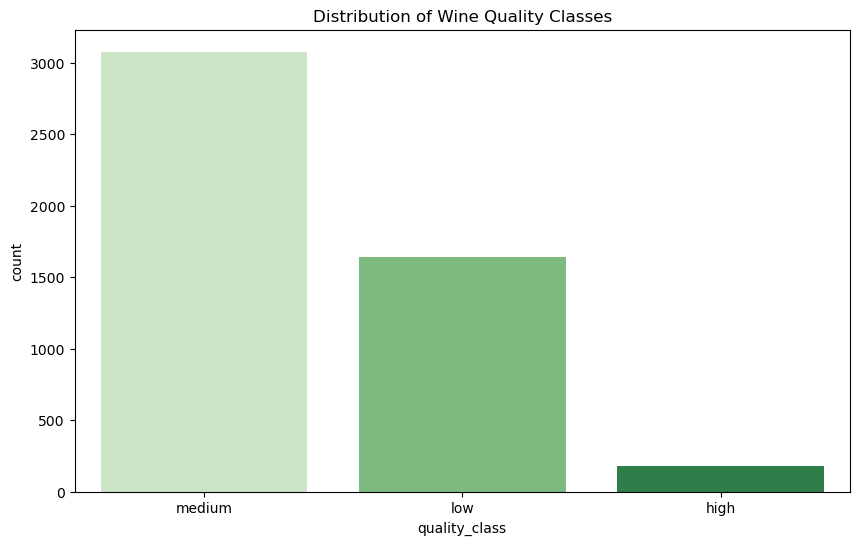

c:\Users\janin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)



Selected Features: ['high_quality', 'alcohol', 'density', 'volatile_acidity', 'total_sulfur_dioxide', 'residual_sugar', 'fixed_acidity', 'pH', 'sulphates']

Confusion Matrix:
[[262  66   0]
 [101 481  34]
 [  0  14  22]]

Classification Report:
              precision    recall  f1-score   support

         low       0.72      0.80      0.76       328
      medium       0.86      0.78      0.82       616
        high       0.39      0.61      0.48        36

    accuracy                           0.78       980
   macro avg       0.66      0.73      0.68       980
weighted avg       0.79      0.78      0.79       980


Overall Accuracy: 0.7806

Feature Importance:
                feature  importance
0          high_quality    0.272170
1               alcohol    0.159473
3      volatile_acidity    0.101830
2               density    0.087467
5        residual_sugar    0.086888
4  total_sulfur_dioxide    0.085744
7                    pH    0.072017
8             sulphates    0.067299
6 

C:\Users\janin\AppData\Local\Temp\ipykernel_24136\745944492.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, palette='Greens')


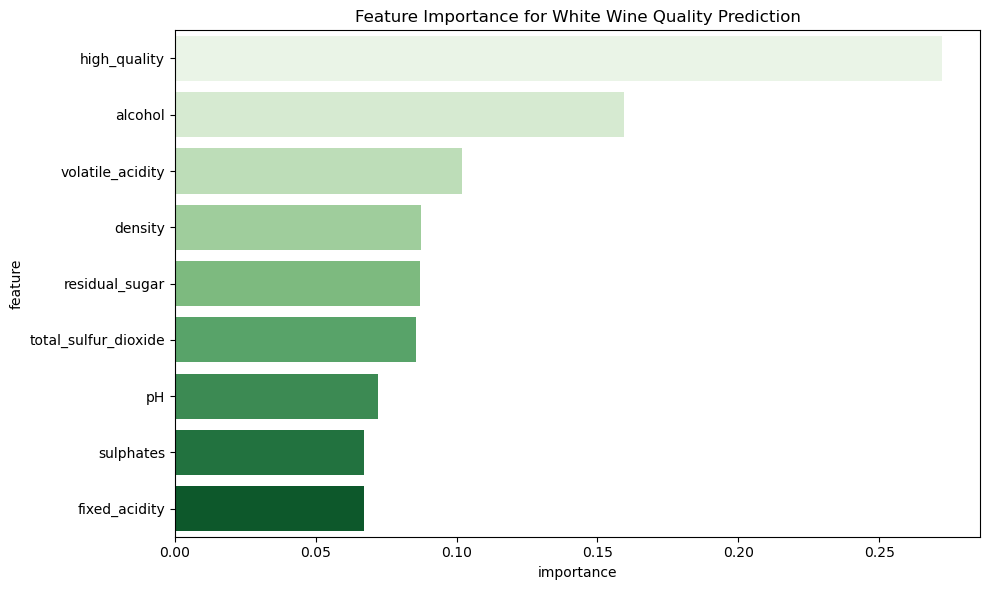

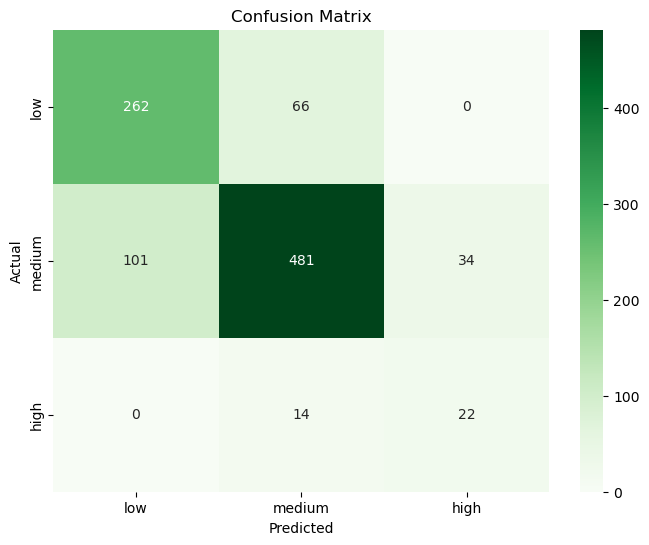

In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Load the data
df = white_wine

# Create a dictionary to map quality_label to descriptive classes
quality_class_map = {0: 'low', 1: 'medium', 2: 'high'}
df['quality_class'] = df['quality_label'].map(quality_class_map)

# Analyze class distribution
print("Quality Class Distribution:")
print(df['quality_class'].value_counts())

# Plot quality distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality_class', data=df, palette='Greens')
plt.title('Distribution of Wine Quality Classes')
plt.show()

# Feature selection using ANOVA
def anova_test(df, feature, target):
    groups = [group for _, group in df.groupby(target)[feature]]
    f_value, p_value = stats.f_oneway(*groups)
    return f_value, p_value

features = df.columns.drop(['quality', 'quality_label', 'quality_class', 'type'])
anova_results = {}

for feature in features:
    f_value, p_value = anova_test(df, feature, 'quality_label')
    anova_results[feature] = {'F-value': f_value, 'p-value': p_value}

anova_df = pd.DataFrame(anova_results).T
anova_df = anova_df.sort_values('F-value', ascending=False)
selected_features = anova_df[anova_df['p-value'] < 0.05].index.tolist()

print("\nSelected Features:", selected_features)

# Prepare data for modeling
X = df[selected_features]
y = df['quality_label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline with SMOTE oversampling and Random Forest
smote = SMOTE(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

pipeline = Pipeline([
    ('smote', smote),
    ('classifier', rf_classifier)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['low', 'medium', 'high']))

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': pipeline.named_steps['classifier'].feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='Greens')
plt.title('Feature Importance for White Wine Quality Prediction')
plt.tight_layout()
plt.show()

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens', 
            xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0,
       1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1,

In [20]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# Load dataset (assuming it's a CSV file)
# df = pd.read_csv("wine_data.csv")

# If 'quality_label' is the classification target, drop 'quality' and use 'quality_label'
X = white_wine.drop(['chlorides', 'type', 'quality', 'quality_label'], axis=1)  # Features
y = white_wine['quality_label']  # Target

# Perform ANOVA F-test
F_values, p_values = f_classif(X, y)

# Display results
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-value': F_values,
    'p-value': p_values
}).sort_values(by='p-value', ascending=True)

print(anova_df)


                 Feature     F-value        p-value
10          high_quality  787.490507  3.052221e-297
9                alcohol  478.162892  2.064790e-190
6                density  209.694577   4.194133e-88
1       volatile_acidity  133.666808   3.012823e-57
5   total_sulfur_dioxide   76.660281   1.650542e-33
3         residual_sugar   21.934774   3.283089e-10
0          fixed_acidity   21.923026   3.321537e-10
7                     pH   19.690946   3.037721e-09
8              sulphates    7.115762   8.206303e-04
4    free_sulfur_dioxide    0.590983   5.538220e-01
2            citric_acid    0.232542   7.925249e-01


In [21]:
# Drop features with p-value > 0.05
columns_to_drop = anova_df[anova_df['p-value'] > 0.05]['Feature']
X_filtered = X.drop(columns=columns_to_drop, axis=1)

# Continue with your model training using X_filtered

In [22]:
anova_df

,Feature,F-value,p-value
10,high_quality,787.490507,3.052221e-297
9,alcohol,478.162892,2.064790e-190
6,density,209.694577,4.194133e-88
1,volatile_acidity,133.666808,3.012823e-57
5,total_sulfur_dioxide,76.660281,1.650542e-33
3,residual_sugar,21.934774,3.283089e-10
0,fixed_acidity,21.923026,3.321537e-10
7,pH,19.690946,3.037721e-09
8,sulphates,7.115762,8.206303e-04
4,free_sulfur_dioxide,0.590983,5.538220e-01


In [23]:
Q1 = white_wine.quantile(0.25)
Q3 = white_wine.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed_acidity            1.000000
volatile_acidity         0.110000
citric_acid              0.120000
residual_sugar           8.200000
chlorides                0.014000
free_sulfur_dioxide     23.000000
total_sulfur_dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
quality_label            1.000000
type                     0.000000
high_quality             0.000000
dtype: float64


In [24]:
print(white_wine.skew())
white_wine.describe()

fixed_acidity           0.647751
volatile_acidity        1.576980
citric_acid             1.281920
residual_sugar          1.077094
chlorides               5.023331
free_sulfur_dioxide     1.406745
total_sulfur_dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
quality_label          -0.124883
type                    0.000000
high_quality            1.377716
dtype: float64


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,type,high_quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.701919,0.0,0.216415
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.531776,0.0,0.411842
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.0,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.000000,0.0,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1.000000,0.0,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000,0.0,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,2.000000,0.0,1.000000


### Outlier Treatment

Chlorides

In [25]:
print(white_wine['chlorides'].quantile(0.10))
print(white_wine['chlorides'].quantile(0.90))

0.03
0.058


In [26]:
white_wine["chlorides"] = np.where(white_wine["chlorides"] <2960.0, 2960.0,white_wine['chlorides'])
white_wine["chlorides"] = np.where(white_wine["chlorides"] >12681.0, 12681.0,white_wine['chlorides'])
print(white_wine['chlorides'].skew())

0.0


C:\Users\janin\AppData\Local\Temp\ipykernel_24136\1130616523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_wine["chlorides"] = np.where(white_wine["chlorides"] <2960.0, 2960.0,white_wine['chlorides'])
C:\Users\janin\AppData\Local\Temp\ipykernel_24136\1130616523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_wine["chlorides"] = np.where(white_wine["chlorides"] >12681.0, 12681.0,white_wine['chlorides'])


In [27]:
white_wine_ml_qual = white_wine.drop('quality', axis=1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Split data into X and Y
X = white_wine_ml_qual.drop('quality_label', axis=1)
y = white_wine_ml_qual['quality_label']

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    
    # Fit the model
    rf_model.fit(x_train, y_train)
    
    # Predictions
    preds = rf_model.predict(x_test)
    
    # Evaluate the model
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

    # Optional: Print classification report for each fold
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

# Calculate and print the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy across all folds: ", mean_accuracy)

Confusion Matrix:
 [[245  83   0]
 [ 68 547   1]
 [  0  22  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       328
           1       0.84      0.89      0.86       616
           2       0.93      0.39      0.55        36

    accuracy                           0.82       980
   macro avg       0.85      0.67      0.73       980
weighted avg       0.82      0.82      0.82       980

Confusion Matrix:
 [[238  90   0]
 [ 67 549   0]
 [  0  18  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       328
           1       0.84      0.89      0.86       616
           2       1.00      0.50      0.67        36

    accuracy                           0.82       980
   macro avg       0.87      0.71      0.76       980
weighted avg       0.82      0.82      0.82       980

Confusion Matrix:
 [[251  77   0]
 [ 71 545   0]
 [  0  21  